# Step 3: Data Exploration and Visualization
Anndi Russell: Capstone

The purpose of this notebook is to show the motivation for the exploration of this data.

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

Import csv with case data:

In [226]:
path='SCDB_2020_01_justiceCentered_Docket_updated.csv'
df_justice=pd.read_csv(path)
df_justice.head(2)

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN


Subset to columns of interest and current justices:

In [227]:
df_justice=df_justice[['caseId','dateArgument','issueArea','justiceName','partyWinning','direction','majority']]
justicelist=['SSotomayor','NMGorsuch','BMKavanaugh','EKagan','CThomas','SGBreyer','SAAlito','JGRoberts']
df_justice=df_justice[df_justice.justiceName.isin(justicelist)]
print(df_justice.dtypes)
print(df_justice.shape)
df_justice.tail()

caseId           object
dateArgument     object
issueArea       float64
justiceName      object
partyWinning    float64
direction       float64
majority        float64
dtype: object
(9915, 7)


,caseId,dateArgument,issueArea,justiceName,partyWinning,direction,majority
93962,2019-074,5/12/2020,13.0,SAAlito,1.0,2.0,1.0
93963,2019-074,5/12/2020,13.0,SSotomayor,1.0,2.0,2.0
93964,2019-074,5/12/2020,13.0,EKagan,1.0,2.0,2.0
93965,2019-074,5/12/2020,13.0,NMGorsuch,1.0,2.0,2.0
93966,2019-074,5/12/2020,13.0,BMKavanaugh,1.0,2.0,2.0


In [228]:
print('Direction')
print(df_justice.direction.unique())
print(df_justice.direction.value_counts())
print()
print('Majority')
print(df_justice.majority.unique())
print(df_justice.majority.value_counts())
print()
print('Winning Party')
print(df_justice.partyWinning.unique())
print(df_justice.partyWinning.value_counts())

Direction
[nan  1.  2.]
1.0    5148
2.0    4259
Name: direction, dtype: int64

Majority
[nan  2.  1.]
2.0    7895
1.0    1740
Name: majority, dtype: int64

Winning Party
[ 0.  1.  2. nan]
1.0    6543
0.0    3341
2.0      25
Name: partyWinning, dtype: int64


In [229]:
df_justice.isna().sum()

caseId            0
dateArgument    974
issueArea        22
justiceName       0
partyWinning      6
direction       508
majority        280
dtype: int64

##### Direction
The direction indicates whether a justice voted conservative or liberal. This was decided by the Washington University Law researchers. There are 508 missing values; this happens when a direction couldn't be concluded, or the justice did not cast a vote. We'll drop these for our exploration.

In [230]:
df_justice=df_justice.dropna(subset = ['direction'])
print(df_justice.shape)
df_justice.head()

(9407, 7)


,caseId,dateArgument,issueArea,justiceName,partyWinning,direction,majority
69291,1991-010,11/6/1991,9.0,CThomas,0.0,1.0,2.0
69318,1991-013,11/5/1991,8.0,CThomas,1.0,1.0,2.0
69336,1991-015,11/13/1991,2.0,CThomas,1.0,1.0,2.0
69372,1991-019,NaN,1.0,CThomas,0.0,1.0,2.0
69381,1991-020,12/2/1991,9.0,CThomas,1.0,2.0,2.0


In [231]:
df_justice.isna().sum()

caseId            0
dateArgument    908
issueArea         2
justiceName       0
partyWinning      6
direction         0
majority          0
dtype: int64

Replace 1 and 2 with C and L, respectively, indicating a conservative or a liberal vote:

In [232]:
df_justice['direction']=df_justice['direction'].replace({1.0:'C',2.0:'L'})

Print a bar plot showing the count of votes each direction. We might be surprised from that to see how often justices vote "across the aisle":

SSotomayor
L    565
C    320
Name: direction, dtype: int64


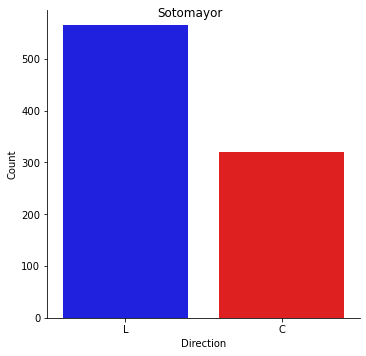

NMGorsuch
C    140
L     90
Name: direction, dtype: int64


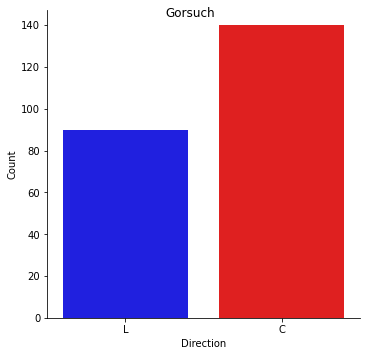

BMKavanaugh
C    80
L    57
Name: direction, dtype: int64


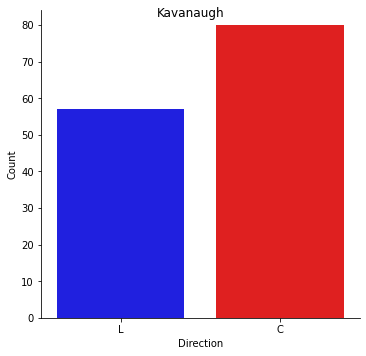

EKagan
L    465
C    298
Name: direction, dtype: int64


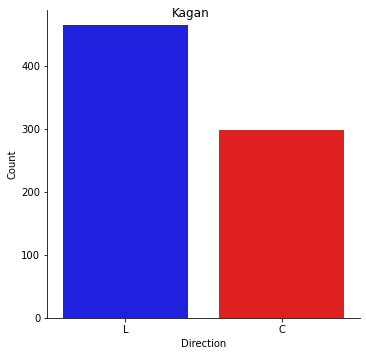

CThomas
C    1832
L     833
Name: direction, dtype: int64


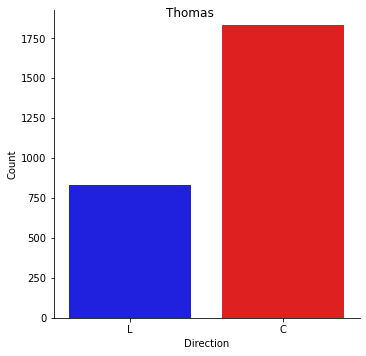

SGBreyer
L    1303
C     987
Name: direction, dtype: int64


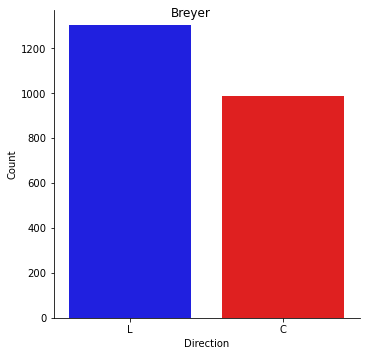

SAAlito
C    775
L    421
Name: direction, dtype: int64


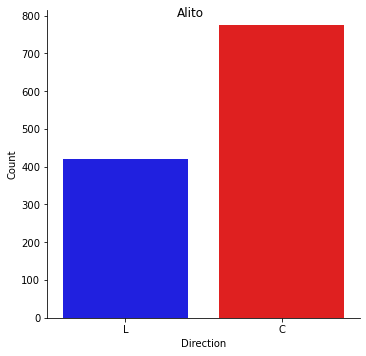

JGRoberts
C    716
L    525
Name: direction, dtype: int64


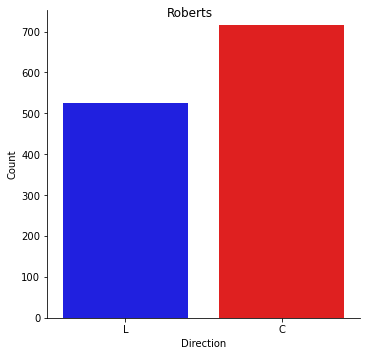

In [238]:
name_dict={'SSotomayor':'Sotomayor','NMGorsuch':'Gorsuch','BMKavanaugh':'Kavanaugh',
          'EKagan':'Kagan','CThomas':'Thomas','SGBreyer':'Breyer',
          'SAAlito':'Alito','JGRoberts':'Roberts'}

colors = ['blue','red']
for name in justicelist:
    print(name)
    counts=df_justice[df_justice.justiceName==name].direction.value_counts()
    print(counts)
    g=sns.catplot(x="direction", kind="count", data=df_justice[df_justice.justiceName==name], order=['L','C'],legend=True)
    sns.set_palette(colors)
    plt.xlabel("Direction")
    plt.ylabel("Count")
    g.fig.suptitle(name_dict[name])
    plt.show()

Pie chart of the same:

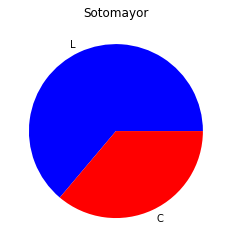

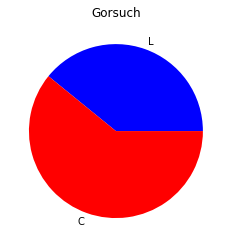

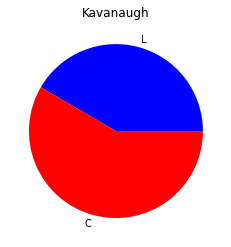

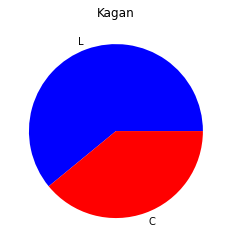

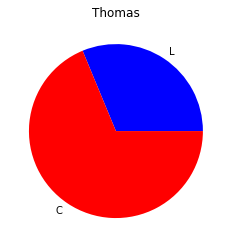

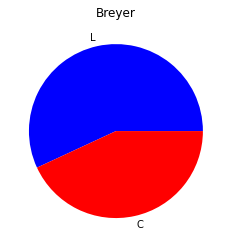

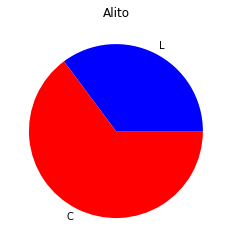

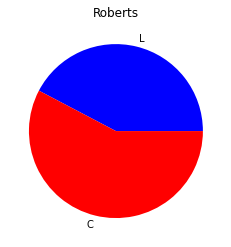

In [218]:
colors = ['blue','red']

for name in justicelist:
    counts=df_justice[df_justice.justiceName==name].direction.value_counts()
    l_count=counts['L']
    c_count=counts['C']
    all_counts=[l_count,c_count]
    labels=['L','C']
    plt.pie(all_counts, labels=labels, colors=colors)
    plt.title(name_dict[name])
    plt.show()

##### Issue area

In [219]:
df_justice.head()

,caseId,dateArgument,issueArea,justiceName,partyWinning,direction,majority
69291,1991-010,11/6/1991,9.0,CThomas,0.0,C,2.0
69318,1991-013,11/5/1991,8.0,CThomas,1.0,C,2.0
69336,1991-015,11/13/1991,2.0,CThomas,1.0,C,2.0
69372,1991-019,NaN,1.0,CThomas,0.0,C,2.0
69381,1991-020,12/2/1991,9.0,CThomas,1.0,L,2.0


In [220]:
issuelist=['Criminal Procedure','Civil Rights','First Amendment',
           'Due Process','Privacy','Attorneys',
           'Unions','Economic Activity','Judicial Power',
           'Federalism','Interstate Relations','Federal Taxation',
           'Miscellaneous','Private Action']
df_justice.issueArea.value_counts()[5]

for i in range(len(issuelist)):
    if i!=10: #no interstate relations cases are included
        print(i+1,issuelist[i],df_justice.issueArea.value_counts()[i+1])

1 Criminal Procedure 2427
2 Civil Rights 1608
3 First Amendment 590
4 Due Process 309
5 Privacy 190
6 Attorneys 136
7 Unions 204
8 Economic Activity 1983
9 Judicial Power 1223
10 Federalism 523
12 Federal Taxation 144
13 Miscellaneous 53
14 Private Action 15


Subset to 4 most common issue areas:

In [221]:
df_issues=df_justice[df_justice.issueArea.isin([1.0,8.0,2.0,9.0])]
print(df_issues.issueArea.value_counts())
df_issues.tail()

1.0    2427
8.0    1983
2.0    1608
9.0    1223
Name: issueArea, dtype: int64


,caseId,dateArgument,issueArea,justiceName,partyWinning,direction,majority
93943,2019-073,5/13/2020,2.0,SGBreyer,1.0,L,2.0
93944,2019-073,5/13/2020,2.0,SAAlito,1.0,L,2.0
93946,2019-073,5/13/2020,2.0,EKagan,1.0,L,2.0
93947,2019-073,5/13/2020,2.0,NMGorsuch,1.0,L,2.0
93948,2019-073,5/13/2020,2.0,BMKavanaugh,1.0,L,2.0


Plot how each justice votes on those issues

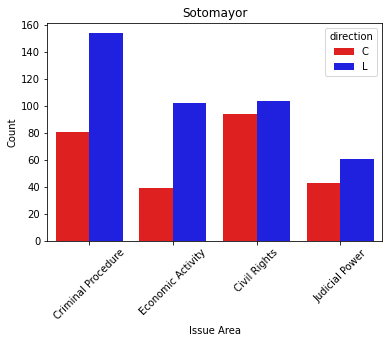

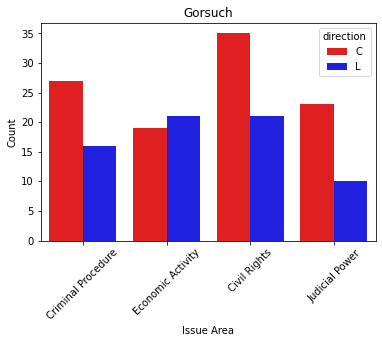

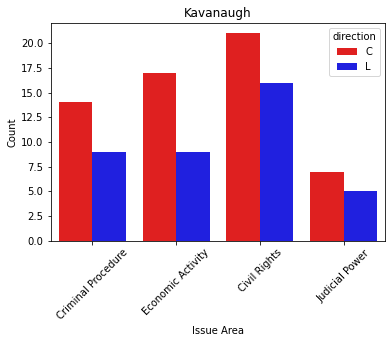

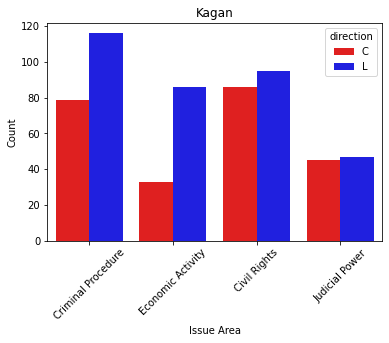

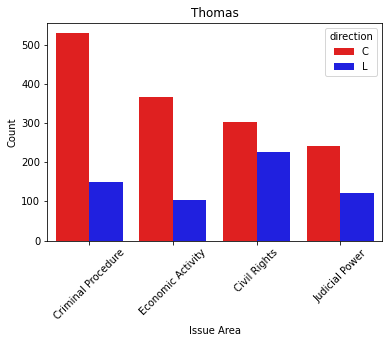

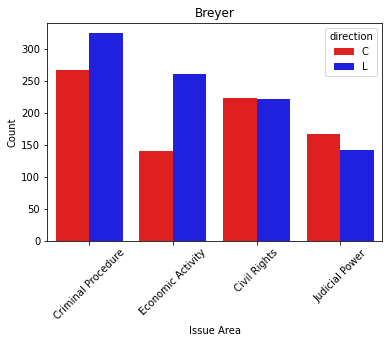

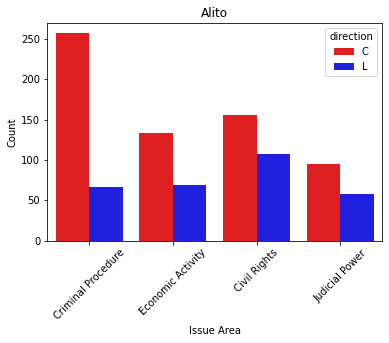

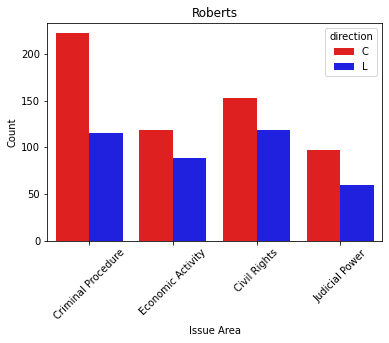

In [222]:
issues=[1.0,8.0,2.0,9.0]
labels=['Criminal Procedure','Economic Activity','Civil Rights','Judicial Power']

for name in justicelist:
    filtered_df=df_issues[df_issues.justiceName==name]
    g=sns.countplot(x='issueArea',data=filtered_df,hue='direction',palette=["Red", "Blue"],hue_order=['C','L'])
    g.set_xticklabels(labels, rotation=45)
    plt.xlabel("Issue Area")
    plt.ylabel("Count")
    plt.title(name_dict[name])
    plt.show()

##### Length of speaking time

Compare amount justices speak:

In [223]:
total_sotomayor=sum(df_sotomayor['res_length'])+sum(df_sotomayor['pet_length'])
total_breyer=sum(df_breyer['res_length'])+sum(df_breyer['pet_length'])
total_thomas=sum(df_thomas['res_length'])+sum(df_thomas['pet_length'])
total_kagan=sum(df_kagan['res_length'])+sum(df_kagan['pet_length'])
total_kavanaugh=sum(df_kavanaugh['res_length'])+sum(df_kavanaugh['pet_length'])
total_alito=sum(df_alito['res_length'])+sum(df_alito['pet_length'])
total_roberts=sum(df_roberts['res_length'])+sum(df_roberts['pet_length'])
total_gorsuch=sum(df_gorsuch['res_length'])+sum(df_gorsuch['pet_length'])

words_per_case_sotomayor=total_sotomayor/len(df_sotomayor)
words_per_case_breyer=total_breyer/len(df_breyer)
words_per_case_thomas=total_thomas/len(df_thomas)
words_per_case_kagan=total_kagan/len(df_kagan)
words_per_case_kavanaugh=total_kavanaugh/len(df_kavanaugh)
words_per_case_alito=total_alito/len(df_alito)
words_per_case_roberts=total_roberts/len(df_roberts)
words_per_case_gorsuch=total_gorsuch/len(df_gorsuch)

justices=['Sotomayor','Breyer','Thomas','Kagan','Kavanaugh','Alito','Roberts','Gorsuch']

all_ratios=[words_per_case_sotomayor,words_per_case_breyer,words_per_case_thomas,
           words_per_case_kagan,words_per_case_kavanaugh,words_per_case_alito,
           words_per_case_roberts,words_per_case_gorsuch]

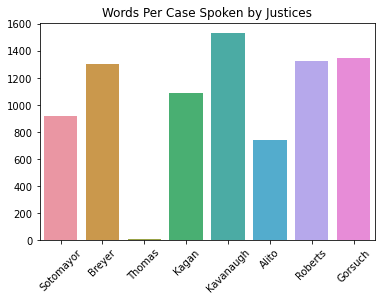

In [224]:
g=sns.barplot(x=justices,y=all_ratios)
plt.title('Words Per Case Spoken by Justices')
g.set_xticklabels(justices, rotation=45);

Thomas rarely speaks (this is commonly known about him).